# Gaussian NB Implementation

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, LabelEncoder

### Dataset Description

### Feature Description
Area (A) – Total surface area of the kernel’s projection.
Perimeter (P) – Length of the kernel’s outer boundary.
Compactness (C) – Shape compactness; higher values indicate rounder shapes.
Length – Longest dimension of the kernel.
Width – Width measured perpendicular to the length.
Asymmetry – Degree of shape irregularity or imbalance.
Groove Length – Length of the central groove along the kernel.

##### Class label

1 → Kama – Wheat variety with moderately compact and symmetric kernels.
2 → Rosa – Wheat variety with wider and less compact kernels.
3 → Canadian – Wheat variety with longer grooves and higher asymmetry.


Reference link to dataset : https://archive.ics.uci.edu/dataset/236/seeds

In [248]:
# loading the dataset
seed_data = pd.read_csv("seeds_dataset.csv")

In [249]:
# dataset summary
seed_data.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length,LABEL
0,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,Canadian
1,13.07,13.92,0.8480,5.472,2.994,5.304,5.395,Canadian
2,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,Canadian
3,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,Canadian
4,12.11,13.27,0.8639,5.236,2.975,4.132,5.012,Canadian


In [250]:
seed_data.shape

(90, 8)

In [251]:
seed_data.dtypes

area             float64
perimeter        float64
compactness      float64
length           float64
width            float64
asymmetry        float64
groove_length    float64
LABEL             object
dtype: object

In [252]:
seed_data.isnull().sum()

area             0
perimeter        0
compactness      0
length           0
width            0
asymmetry        0
groove_length    0
LABEL            0
dtype: int64

In [253]:
seed_data.describe()

,area,perimeter,compactness,length,width,asymmetry,groove_length
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,14.922333,14.585556,0.871433,5.636878,3.268422,3.659169,5.409122
std,3.022909,1.332049,0.026874,0.437506,0.399180,1.506971,0.475133
min,10.590000,12.410000,0.808200,4.899000,2.630000,0.765100,4.605000
25%,12.207500,13.452500,0.856475,5.285250,2.909500,2.317750,5.069250
50%,14.610000,14.360000,0.877100,5.555500,3.263000,3.390000,5.226000
75%,17.045000,15.602500,0.890300,5.925250,3.561750,4.833000,5.826500
max,21.180000,17.250000,0.918300,6.579000,4.033000,8.315000,6.451000


In [254]:
seed_data["LABEL"].value_counts()

LABEL
Canadian    30
Kama        30
Rosa        30
Name: count, dtype: int64

In [255]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
seed_data['LABEL'] = le.fit_transform(seed_data['LABEL'])

In [256]:
X = seed_data.drop("LABEL", axis=1)
y = seed_data["LABEL"]

In [257]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Gaussian Naïve Bayes

In [258]:
print("==== Gaussian Naive Bayes ====")
print("Training Data (Gaussian):\n", X_train_raw.head())
print("\nTraining Labels:\n", y_train.head())
print("\nTesting Data (Gaussian):\n", X_test_raw.head())
print("\nTesting Labels:\n", y_test.head())

==== Gaussian Naive Bayes ====
Training Data (Gaussian):
      area  perimeter  compactness  length  width  asymmetry  groove_length
9   12.26      13.60       0.8333   5.408  2.833      4.756          5.360
15  11.02      13.00       0.8189   5.325  2.701      6.735          5.163
76  20.16      17.03       0.8735   6.513  3.773      1.910          6.185
22  12.19      13.36       0.8579   5.240  2.909      4.857          5.158
49  14.99      14.56       0.8883   5.570  3.377      2.958          5.175

Training Labels:
 9     0
15    0
76    2
22    0
49    1
Name: LABEL, dtype: int64

Testing Data (Gaussian):
      area  perimeter  compactness  length  width  asymmetry  groove_length
71  17.12      15.55       0.8892   5.850  3.566      2.858          5.746
10  11.55      13.10       0.8455   5.167  2.845      6.715          4.956
44  12.36      13.19       0.8923   5.076  3.042      3.220          4.605
39  13.89      14.02       0.8880   5.439  3.199      3.986          4.738
74  1

In [259]:
gnb = GaussianNB()
gnb.fit(X_train_raw, y_train)
y_pred_gnb = gnb.predict(X_test_raw)
y_proba_gnb = gnb.predict_proba(X_test_raw)

In [260]:
print("\nAccuracy:", accuracy_score(y_test, y_pred_gnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))


Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.83      0.83      0.83         6
           2       1.00      0.83      0.91         6

    accuracy                           0.89        18
   macro avg       0.90      0.89      0.89        18
weighted avg       0.90      0.89      0.89        18



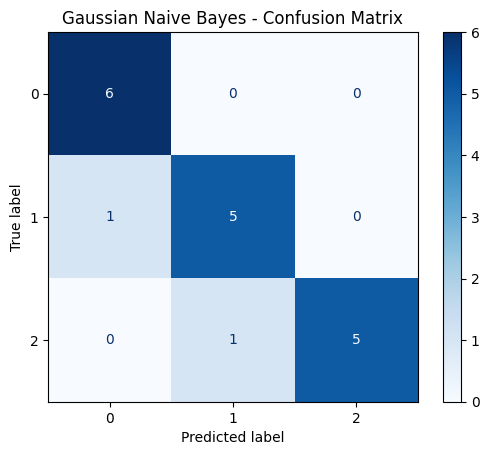

In [261]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gnb, cmap="Blues")
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.show()

In [262]:
print("\nPrediction Probabilities (first 10 rows):")
print(pd.DataFrame(y_proba_gnb, columns=[f"Prob_Class_{cls}" for cls in gnb.classes_]).head(10))


Prediction Probabilities (first 10 rows):
   Prob_Class_0  Prob_Class_1  Prob_Class_2
0  2.371330e-29  1.693809e-04  9.998306e-01
1  1.000000e+00  1.953322e-12  8.492559e-26
2  8.538029e-01  1.461971e-01  3.798217e-17
3  2.870518e-05  9.999713e-01  1.091805e-12
4  9.781740e-15  9.278424e-01  7.215765e-02
5  1.578700e-12  9.999996e-01  3.532665e-07
6  1.000000e+00  1.163711e-08  1.730012e-23
7  2.005459e-65  8.913675e-20  1.000000e+00
8  3.196377e-24  1.503113e-04  9.998497e-01
9  1.000000e+00  1.976089e-09  1.020962e-24


### Categorical Naive Bayes

In [263]:
cat_encoder = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_cat = cat_encoder.fit_transform(X_train_raw)
X_test_cat = cat_encoder.transform(X_test_raw)

In [264]:
print("Training Data (Categorical - binned):\n", pd.DataFrame(X_train_cat, columns=X.columns).head())
print("\nTraining Labels:\n", y_train.head())
print("\nTesting Data (Categorical - binned):\n", pd.DataFrame(X_test_cat, columns=X.columns).head())
print("\nTesting Labels:\n", y_test.head())

Training Data (Categorical - binned):
    area  perimeter  compactness  length  width  asymmetry  groove_length
0   0.0        1.0          1.0     1.0    0.0        2.0            1.0
1   0.0        0.0          0.0     1.0    0.0        3.0            1.0
2   4.0        4.0          2.0     4.0    4.0        0.0            4.0
3   0.0        0.0          2.0     1.0    0.0        2.0            1.0
4   2.0        2.0          3.0     1.0    2.0        1.0            1.0

Training Labels:
 9     0
15    0
76    2
22    0
49    1
Name: LABEL, dtype: int64

Testing Data (Categorical - binned):
    area  perimeter  compactness  length  width  asymmetry  groove_length
0   3.0        3.0          3.0     2.0    3.0        1.0            3.0
1   0.0        0.0          1.0     0.0    0.0        3.0            0.0
2   0.0        0.0          3.0     0.0    1.0        1.0            0.0
3   1.0        1.0          3.0     1.0    2.0        2.0            0.0
4   2.0        2.0          2.0   

In [265]:
cnb = CategoricalNB()
cnb.fit(X_train_cat, y_train)
y_pred_cnb = cnb.predict(X_test_cat)
y_proba_cnb = cnb.predict_proba(X_test_cat)

In [266]:
print("\nAccuracy:", accuracy_score(y_test, y_pred_cnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cnb))


Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.83      0.83      0.83         6
           2       1.00      0.83      0.91         6

    accuracy                           0.89        18
   macro avg       0.90      0.89      0.89        18
weighted avg       0.90      0.89      0.89        18



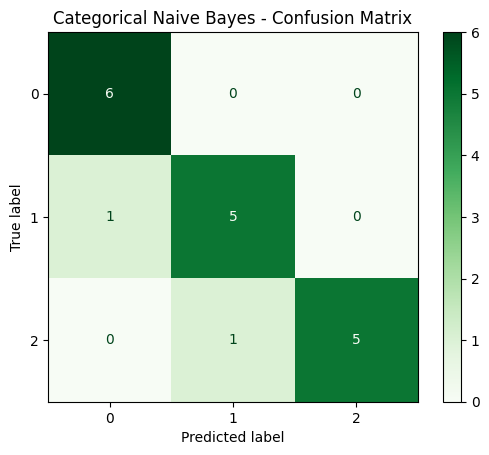

In [267]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cnb, cmap="Greens")
plt.title("Categorical Naive Bayes - Confusion Matrix")
plt.show()

In [268]:
print("\nPrediction Probabilities (first 10 rows):")
print(pd.DataFrame(y_proba_cnb, columns=[f"Prob_Class_{cls}" for cls in cnb.classes_]).head(10))


Prediction Probabilities (first 10 rows):
   Prob_Class_0  Prob_Class_1  Prob_Class_2
0      0.000001      0.001107  9.988921e-01
1      0.999991      0.000009  4.499112e-07
2      0.929411      0.070250  3.387066e-04
3      0.075551      0.924383  6.666222e-05
4      0.000189      0.954842  4.496902e-02
5      0.000002      0.999409  5.883493e-04
6      0.998563      0.001415  2.211245e-05
7      0.000002      0.000047  9.999504e-01
8      0.000369      0.240017  7.596139e-01
9      0.999914      0.000083  2.604985e-06


### Multinomial Naive Bayes

In [269]:
le = LabelEncoder()
seed_data["LABEL"] = le.fit_transform(seed_data["LABEL"]) 


In [270]:
X = seed_data.drop("LABEL", axis=1).astype(int)
y = seed_data["LABEL"]


In [271]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [272]:
print("Training Data (Multinomial - count based):\n", pd.DataFrame(X_train, columns=X.columns).head())
print("\nTraining Labels:\n", y_train.head())
print("\nTesting Data (multinomial - Count bases):\n", pd.DataFrame(X_test, columns=X.columns).head())
print("\nTesting Labels:\n", y_test.head())

Training Data (Multinomial - count based):
     area  perimeter  compactness  length  width  asymmetry  groove_length
9     12         13            0       5      2          4              5
15    11         13            0       5      2          6              5
76    20         17            0       6      3          1              6
22    12         13            0       5      2          4              5
49    14         14            0       5      3          2              5

Training Labels:
 9     0
15    0
76    2
22    0
49    1
Name: LABEL, dtype: int64

Testing Data (multinomial - Count bases):
     area  perimeter  compactness  length  width  asymmetry  groove_length
71    17         15            0       5      3          2              5
10    11         13            0       5      2          6              4
44    12         13            0       5      3          3              4
39    13         14            0       5      3          3              4
74    15     

In [273]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


MultinomialNB()

In [274]:
y_pred_mnb = mnb.predict(X_test)
y_proba_mnb = mnb.predict_proba(X_test)


In [275]:
print("\nAccuracy:", accuracy_score(y_test, y_pred_mnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mnb))


Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.67      0.33      0.44         6
           2       0.50      0.67      0.57         6

    accuracy                           0.67        18
   macro avg       0.67      0.67      0.65        18
weighted avg       0.67      0.67      0.65        18



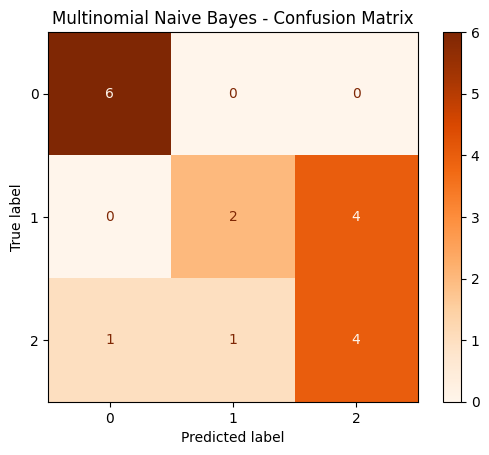

In [276]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mnb, cmap="Oranges")
plt.title("Multinomial Naive Bayes - Confusion Matrix")
plt.show()

In [277]:
print("\nPrediction Probabilities (first 10 rows):")
print(pd.DataFrame(y_proba_mnb, columns=[f"Prob_Class_{cls}" for cls in mnb.classes_]).head(10))


Prediction Probabilities (first 10 rows):
   Prob_Class_0  Prob_Class_1  Prob_Class_2
0      0.070339      0.467006      0.462655
1      0.854219      0.045420      0.100361
2      0.293662      0.348689      0.357649
3      0.251641      0.366944      0.381416
4      0.344552      0.268358      0.387090
5      0.198052      0.372959      0.428989
6      0.411592      0.273944      0.314463
7      0.111453      0.393965      0.494583
8      0.471521      0.186537      0.341942
9      0.573185      0.172261      0.254554


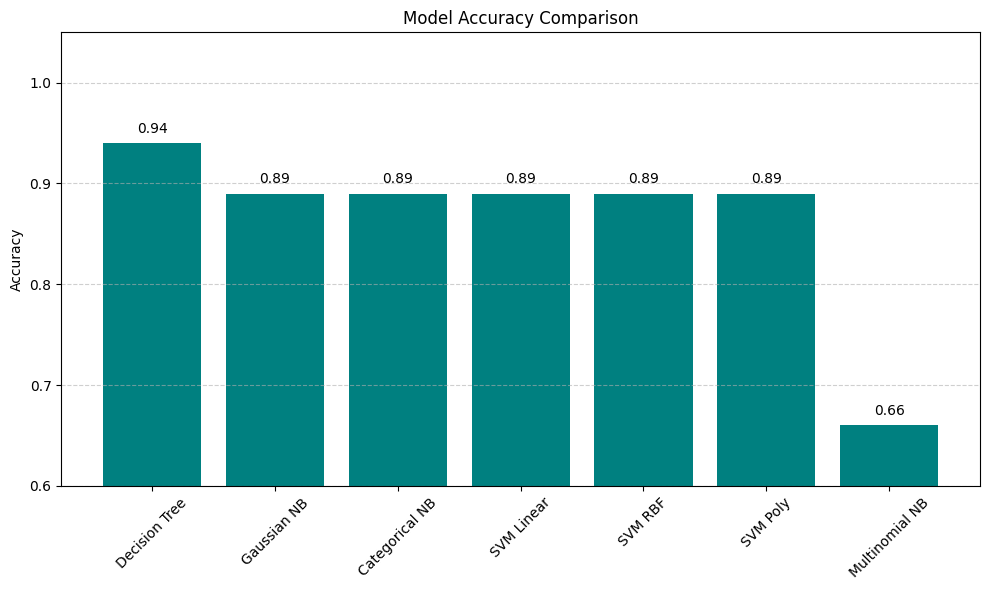

In [279]:
models = [
    "Decision Tree", "Gaussian NB", "Categorical NB",
    "SVM Linear", "SVM RBF", "SVM Poly", "Multinomial NB"
]
accuracies = [0.94, 0.89, 0.89, 0.89, 0.89, 0.89, 0.66]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='teal')
plt.ylim(0.6, 1.05)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
